In [1]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.linear_model import LogisticRegression
dataset = pd.read_csv('/content/drive/MyDrive/KULIAH/smt-5/KRIPTO/word.csv')
print(dataset.head())
print(dataset.isna().sum())


                                                word
0  Thequickbrownfoxjumpsoverthebusydogsoftlyalway...
1  Theenergeticcatjumpedoverthelazyfoxquietlyever...
2  Brightsunnymorningsmakemehappyandjoyfulmostoft...
3  Learningnewthingskeepsyourmindsharpandactiveev...
4  Readingbooksbroadensourhorizonsandexpandsknowl...
word    0
dtype: int64


In [ ]:
dataset['word'] = dataset['word'].str.lower()
dataset.sample(10)

In [3]:
# create shift
shifts = range(26)

# Function to encrypt text with Caesar cipher
def caesar_cipher_encrypt(text, shift):
    text = text.lower()
    result = ""
    for char in text:
        if char.isalpha():
            shifted = chr((ord(char) - ord('a') + shift) % 26 + ord('a'))
            result += shifted
        else:
            result += char
    return result

# Function to extract frequency features
def extract_features(text):
    # a => 3, e => 5
    frequency = Counter(text)

    total = sum(frequency.values())
    features = [frequency.get(chr(i), 0) / total for i in range(ord('a'), ord('z') + 1)]
    # [0.2, 0.4]
    return features

data = []


In [4]:
# extract features
data_word = {}
plains = []
ciphers = []
keys = []
for text in dataset['word']:
    for shift in shifts:
        encrypted = caesar_cipher_encrypt(text, shift)
        features = extract_features(encrypted) #[0.1, 0.2, ...]
        data.append((features, shift))

        plains.append(text)
        ciphers.append(encrypted)
        keys.append(shift)


df = pd.DataFrame(data, columns=['features', 'shift'])
df.head()

,features,shift
0,"[0.046875, 0.03125, 0.03125, 0.015625, 0.0625,...",0
1,"[0.0, 0.046875, 0.03125, 0.03125, 0.015625, 0....",1
2,"[0.078125, 0.0, 0.046875, 0.03125, 0.03125, 0....",2
3,"[0.015625, 0.078125, 0.0, 0.046875, 0.03125, 0...",3
4,"[0.03125, 0.015625, 0.078125, 0.0, 0.046875, 0...",4


In [5]:
data_word['plaintext'] = plains
data_word['cipher'] = ciphers
data_word['key'] = keys

df_word = pd.DataFrame(data_word)
path = '/content/drive/MyDrive/KULIAH/smt-5/KRIPTO'
df_word.to_excel(f'{path}/result.xlsx', index=False)

In [6]:
# prompt: my df has feature named 'features'. the features has structure of array that length is 26. i want to transform each element of array in features as distinct feature

# Assuming 'features' column contains lists of length 26
features_df = pd.DataFrame(df['features'].tolist(), columns=[f'feature_{i}' for i in range(26)])
df = pd.concat([df, features_df], axis=1)
df = df.drop(columns=['features'])
print(df.head())
df.shape

   shift  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      0   0.046875   0.031250   0.031250   0.015625   0.062500   0.031250   
1      1   0.000000   0.046875   0.031250   0.031250   0.015625   0.062500   
2      2   0.078125   0.000000   0.046875   0.031250   0.031250   0.015625   
3      3   0.015625   0.078125   0.000000   0.046875   0.031250   0.031250   
4      4   0.031250   0.015625   0.078125   0.000000   0.046875   0.031250   

   feature_6  feature_7  feature_8  ...  feature_16  feature_17  feature_18  \
0   0.015625   0.031250   0.046875  ...    0.015625    0.046875    0.093750   
1   0.031250   0.015625   0.031250  ...    0.015625    0.015625    0.046875   
2   0.062500   0.031250   0.015625  ...    0.093750    0.015625    0.015625   
3   0.015625   0.062500   0.031250  ...    0.031250    0.093750    0.015625   
4   0.031250   0.015625   0.062500  ...    0.015625    0.031250    0.093750   

   feature_19  feature_20  feature_21  feature_22  featu

(1586, 27)

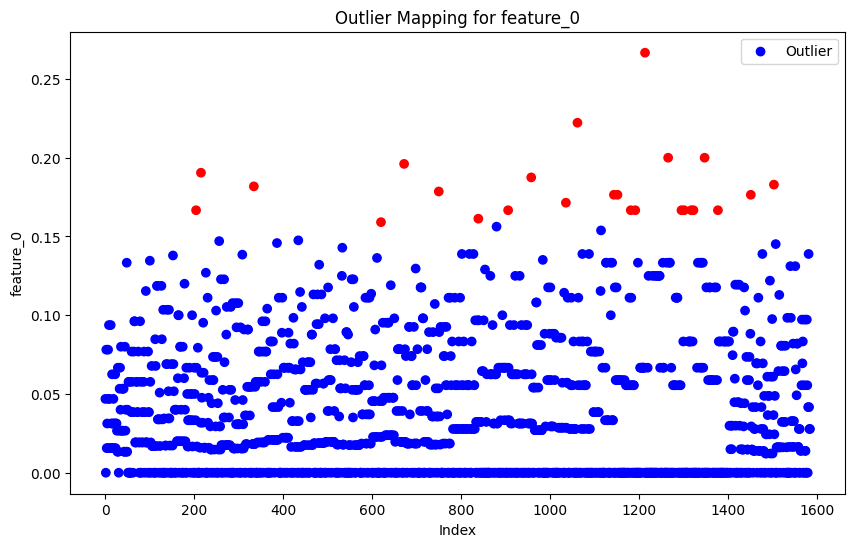

In [7]:
# prompt: make plot that mapping outlier into true and false for feature_0

import matplotlib.pyplot as plt

# Calculate the IQR for feature_0
Q1 = df['feature_0'].quantile(0.25)
Q3 = df['feature_0'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new column 'outlier' indicating whether each value is an outlier
df['outlier'] = (df['feature_0'] < lower_bound) | (df['feature_0'] > upper_bound)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['feature_0'], c=df['outlier'].map({True: 'red', False: 'blue'}))
plt.xlabel("Index")
plt.ylabel("feature_0")
plt.title("Outlier Mapping for feature_0")
plt.legend(["Outlier", "Not Outlier"])
plt.show()

In [8]:
# prompt: do it again but now for from feature_1 to feature_25

import pandas as pd
from collections import Counter
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded as 'df' from the previous code block.
# ... (Previous code to load and process the data) ...

# Assuming df already contains 'feature_0' to 'feature_25'
for i in range(1, 26):  # Iterate from feature_1 to feature_25
    # Calculate the IQR for the current feature
    Q1 = df[f'feature_{i}'].quantile(0.25)
    Q3 = df[f'feature_{i}'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new column indicating outliers for the current feature
    df[f'outlier_feature_{i}'] = (df[f'feature_{i}'] < lower_bound) | (df[f'feature_{i}'] > upper_bound)

    # Create the plot for the current feature
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[f'feature_{i}'], c=df[f'outlier_feature_{i}'].map({True: 'red', False: 'blue'}))
    plt.xlabel("Index")
    plt.ylabel(f"feature_{i}")
    plt.title(f"Outlier Mapping for feature_{i}")
    plt.legend(["Outlier", "Not Outlier"])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# prompt: create X which has attribute from feature_0 to feature_25 and Y is 'shift' label then split into train and test where these ratio are 7:3

from sklearn.model_selection import train_test_split

# Assuming 'df' is already defined from the previous code
X = df.loc[:, 'feature_0':'feature_25']
y = df['shift']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# prompt: fit x_train and y_train into logistic regression model

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# prompt: test model with x_train and y_train then print accuracy, precision, recall, and f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the training data
y_pred_train = model.predict(X_train)

# Calculate the metrics
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted') # Use 'weighted' for multiclass
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

# Print the metrics
print(f"Training Accuracy: {accuracy}")
print(f"Training Precision: {precision}")
print(f"Training Recall: {recall}")
print(f"Training F1-score: {f1}")

Training Accuracy: 0.9576576576576576
Training Precision: 0.9594743284137575
Training Recall: 0.9576576576576576
Training F1-score: 0.9576827737024793


In [ ]:
# prompt: take one value from x_test and y_test then use x_test as input model to predict k. then print k and y_test

# Take one value from x_test and y_test
x_test_sample = X_test.iloc[[1]]
y_test_sample = y_test.iloc[1]

# Use x_test as input to the model to predict k
k = model.predict(x_test_sample)[0]

# Print k and y_test
print(f"Predicted shift (k): {k}")
print(f"Actual shift (y_test): {y_test_sample}")

In [ ]:
# prompt: create new df from '/content/ouput.xlsx' then split into train and test data 7:3

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel('/content/ouput.xlsx')

# Assuming 'feature_0' to 'feature_25' and 'shift' columns exist
X = df.loc[:, 'plaintext':'cipher']
y = df['key']

# Split data into training and testing sets (70% train, 30% test)
_, X_test, _, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_test.shape
# predict with some ciphertext
P1 = X_test.iloc[2, [0]].to_string(index=False)
K1 = int(y_test.iloc[2])
print(f'p1 {P1}')
print(f'type of P1 {type(P1)} K1 {type(K1)}')
print('\n')
C1 = caesar_cipher_encrypt(P1, K1)
F1 = extract_features(C1)
predict_shift = int(model.predict([F1]))

print(f'plaintext {P1}')
print(f'key {K1}')
print(f'ciphertext {C1}')
print(f'predicted key {predict_shift}')
print(f'decrypt result {caesar_cipher_encrypt(C1, -int(predict_shift))}')


In [ ]:
# prompt: create two variables named P2, K2 which take value from X_test, y_test which index i where i is a random value that ranged from 0 to length of X_test

import random

# Assuming X_test and y_test are already defined from the previous code

i = random.randint(0, len(X_test) - 1)
P2 = X_test.iloc[i, [0]].to_string(index=False)
K2 = int(y_test.iloc[i])
C2 = caesar_cipher_encrypt(P2, K2)
F2 = extract_features(C2)
predict_shift = int(model.predict([F2]))
print(f'i: {i}')
print(f"Plaintext: {P2}")
print(f'ciphertext: {C2}')
print(f'decrypt result: {caesar_cipher_encrypt(C2, -predict_shift)}')
print(f"Key: {K2}")
print(f'predicted key {predict_shift}')


In [12]:
from joblib import dump

dump(model, 'new_model.joblib')

['new_model.joblib']